# Caso Práctico: Clasificación de imágenes

## 1. Conjunto de datos

In [3]:
from tensorflow.keras import datasets

In [7]:
fashion_mnist = datasets.fashion_mnist

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


## 2. Visualización del conjunto de datos

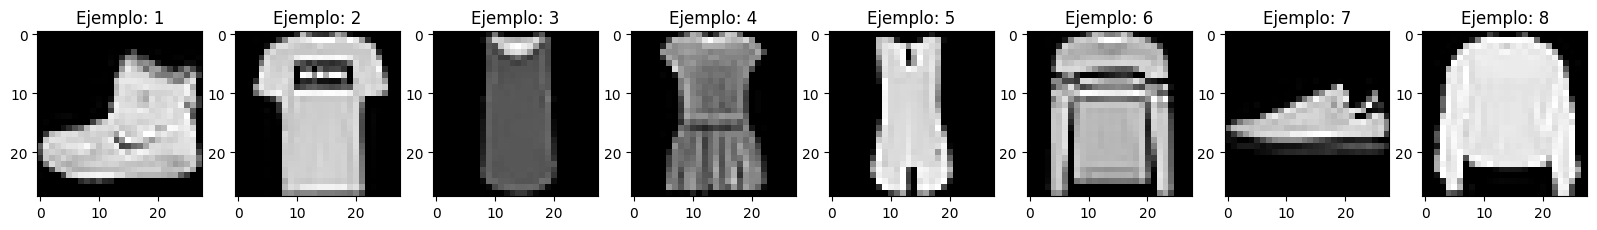

In [13]:
import numpy as ap
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, img in zip(range(1,9),x_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title('Ejemplo: '+str(index))
plt.show()

In [14]:
print("Longitud subconjunto de entrenamiento: ", len(x_train))
print("Longitud subconjunto de pruebas: ", len(x_test))

Longitud subconjunto de entrenamiento:  60000
Longitud subconjunto de pruebas:  10000


## 3. Transformación del conjunto de datos

In [20]:
x_train_prep = x_train.reshape((60000,28*28))
x_test_prep = x_test.reshape((10000, 28*28))

In [21]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
x_train_prep = transformer.fit_transform(x_train_prep)
y_test_prep = transformer.transform(x_test_prep)

In [23]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

## 4. Construcción del modelo

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

## Primera capa formada por 300 neuronas (contiene la entrada)
## Segunda capa 100 neuronas
## Ultima capa formada por 10 neuronas
network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [33]:
network.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy','Precision'])

In [35]:
history = network.fit(x_train_prep,
                     y_train_prep,
                     batch_size=32,
                     epochs=15,
                     validation_data=[x_test_prep, y_test_prep])

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5175 - accuracy: 0.8123 - precision: 0.8688 - val_loss: 1048.5931 - val_accuracy: 0.7965 - val_precision: 0.7965
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3743 - accuracy: 0.8636 - precision: 0.8890 - val_loss: 1050.7017 - val_accuracy: 0.8081 - val_precision: 0.8081
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3313 - accuracy: 0.8785 - precision: 0.9019 - val_loss: 1198.3857 - val_accuracy: 0.8017 - val_precision: 0.8017
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3080 - accuracy: 0.8860 - precision: 0.9061 - val_loss: 1434.6420 - val_accuracy: 0.7924 - val_precision: 0.7924
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2882 - accuracy: 0.8920 - precision: 0.9101 - val_loss: 1231.8796 - val_accuracy: 0.8037 - val_precision: 0.8037
Epoch 6/15
1875/1875 [==================